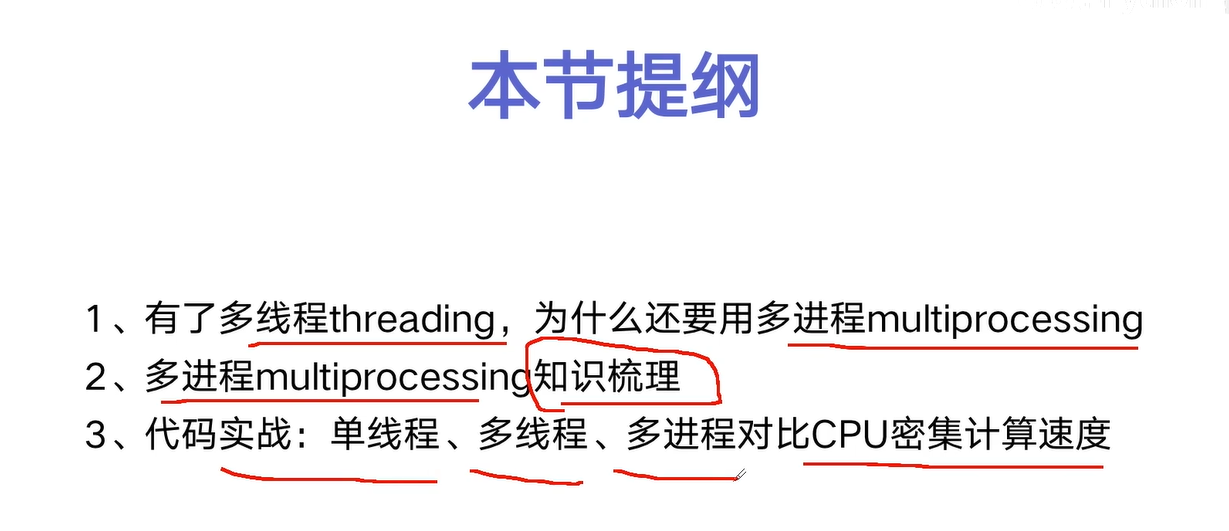

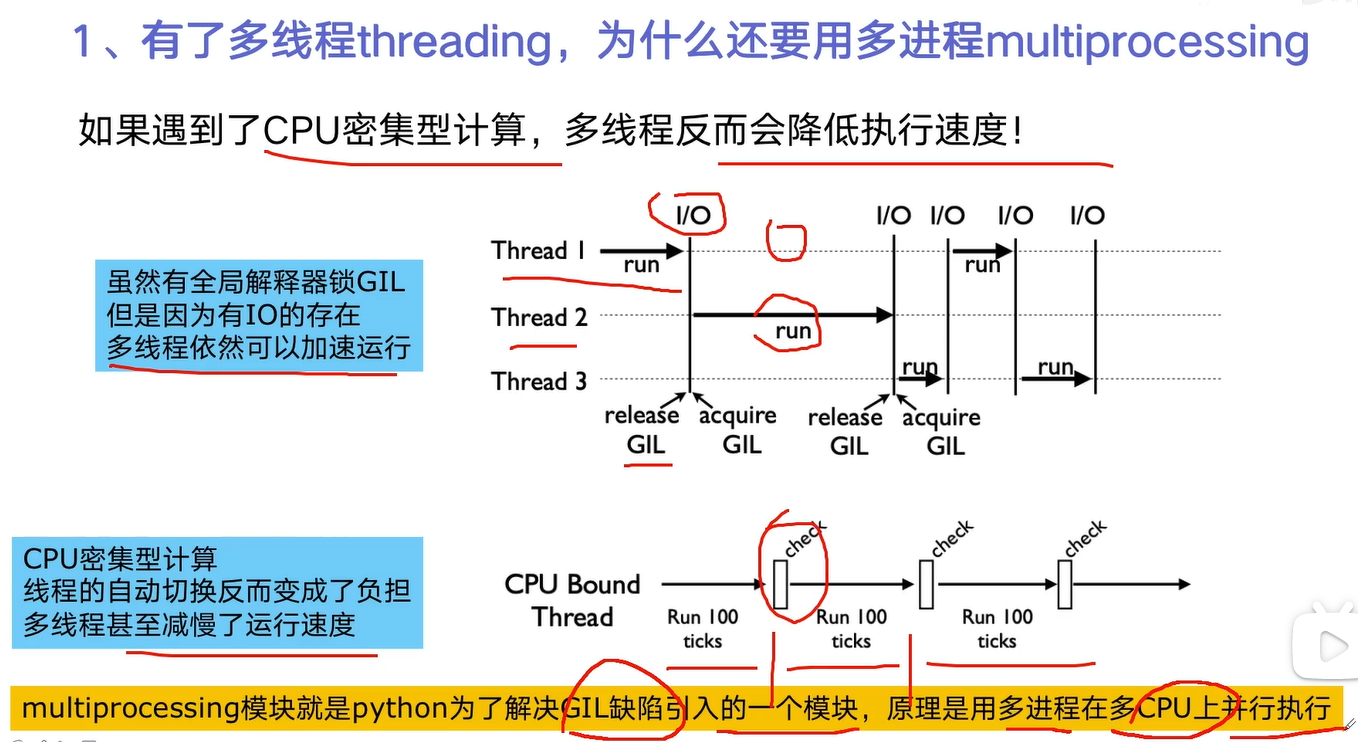

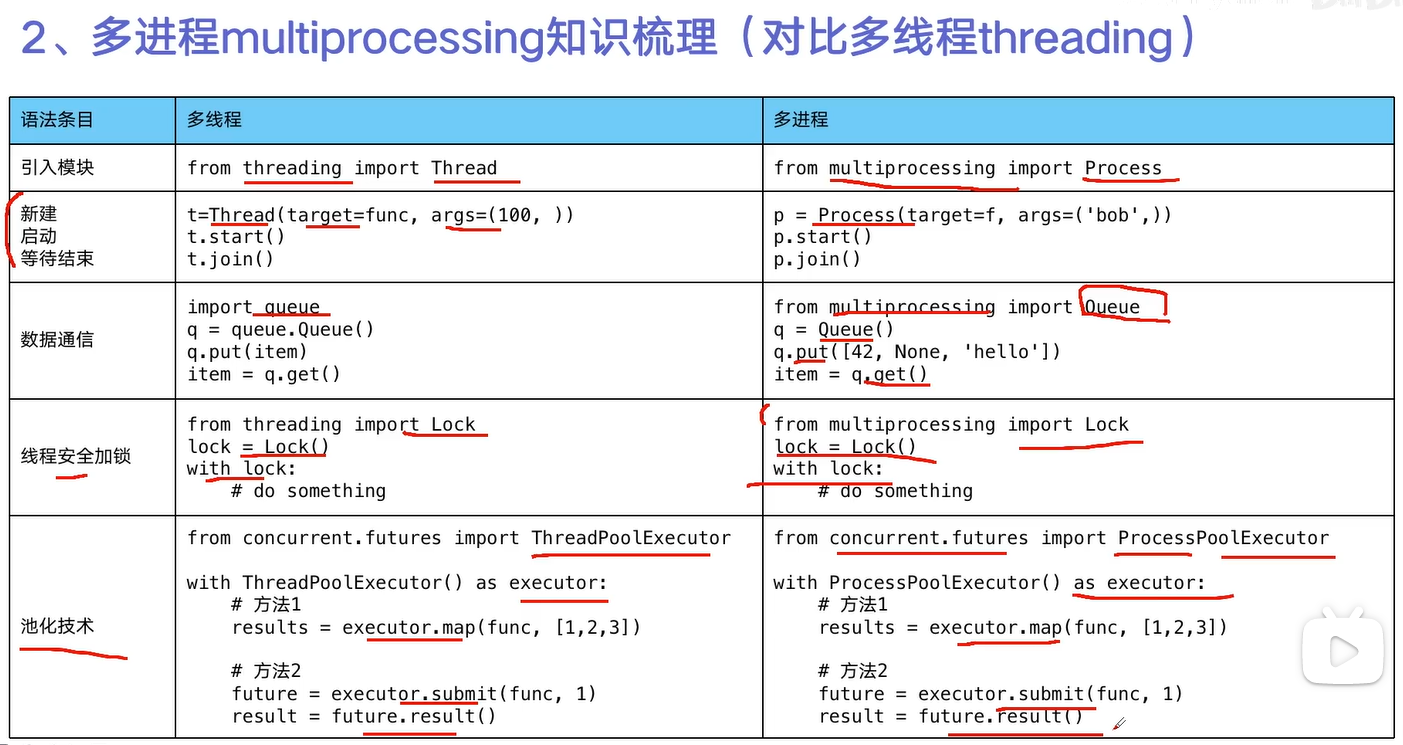

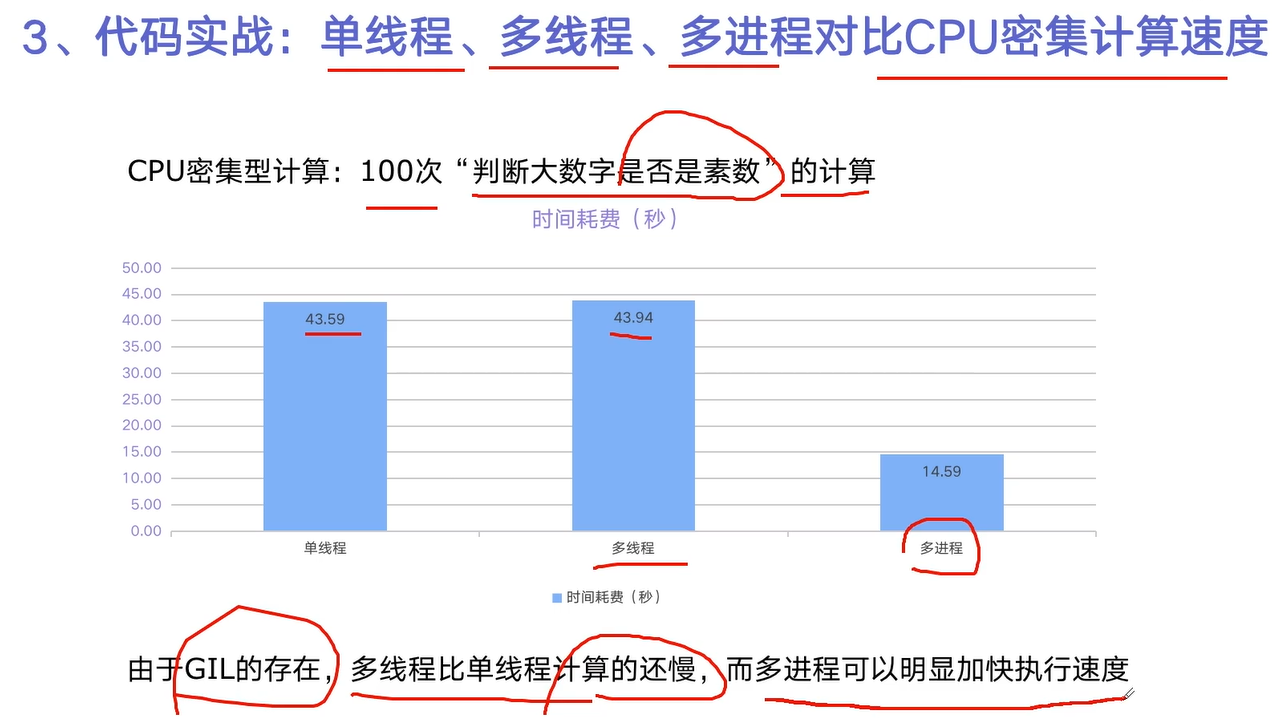

# 4、代码实现：

In [1]:
import math
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import time

PRIMES = [112272535095293] * 100


def is_prime(n):
    """判断素数，是cpu密集型计算"""
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    sqrt_n = int(math.floor(math.sqrt(n)))
    for i in range(3, sqrt_n + 1, 2):
        if n % i == 0:
            return False
    return True


def single_thread():
    """单线程"""
    for number in PRIMES:
        is_prime(number)


def multi_thread():
    """多线程"""
    with ThreadPoolExecutor() as pool: # 使用线程池方法
        pool.map(is_prime, PRIMES)


def multi_process():
    """多进程"""
    with ProcessPoolExecutor() as pool: # 进程池方法
        pool.map(is_prime, PRIMES)


if __name__ == "__main__":
    start = time.time()
    single_thread()
    end = time.time()
    print("single_thread, cost:", end - start, "seconds")

    start = time.time()
    multi_thread()
    end = time.time()
    print("multi_thread, cost:", end - start, "seconds")

    start = time.time()
    multi_process()
    end = time.time()
    print("multi_process, cost:", end - start, "seconds")

single_thread, cost: 46.57550096511841 seconds
multi_thread, cost: 47.16788911819458 seconds
multi_process, cost: 0.25529003143310547 seconds
